<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024/blob/main/2.%20Sales%20Forecasting/Sales_Forecasting_time_series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

time series

sales forecast

In [84]:
print('Hello')

Hello


In [85]:
from datetime import datetime
print(datetime.now())

2024-09-11 07:24:54.318724


In [86]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

In [87]:
data_df = pd.read_csv('train3.csv')

# Exploratory Data Analysis, EDA

In [88]:
rows, cols = data_df.shape
print("Dataset contains", rows, "rows and ", cols, "columns.\n")

Dataset contains 230090 rows and  4 columns.



In [89]:
data_df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [90]:
data_df.tail()

,Date,store,product,number_sold
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899
230089,2018-12-31,6,9,912


In [91]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [92]:
data_df.describe()

,store,product,number_sold
count,230090.000000,230090.000000,230090.000000
mean,3.000000,4.500000,780.926107
std,2.000004,2.872288,204.096737
min,0.000000,0.000000,238.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,835.000000
75%,5.000000,7.000000,914.000000
max,6.000000,9.000000,1205.000000


In [93]:
# Convert the column to date type
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%Y-%m-%d', errors='coerce')

In [94]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   store        230090 non-null  int64         
 2   product      230090 non-null  int64         
 3   number_sold  230090 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.0 MB


In [95]:
data_df.describe()

,Date,store,product,number_sold
count,230090,230090.000000,230090.000000,230090.000000
mean,2014-07-01 23:59:59.999999744,3.000000,4.500000,780.926107
min,2010-01-01 00:00:00,0.000000,0.000000,238.000000
25%,2012-04-01 00:00:00,1.000000,2.000000,722.000000
50%,2014-07-02 00:00:00,3.000000,4.500000,835.000000
75%,2016-10-01 00:00:00,5.000000,7.000000,914.000000
max,2018-12-31 00:00:00,6.000000,9.000000,1205.000000
std,NaN,2.000004,2.872288,204.096737


In [96]:
data_df.isnull().sum()

,0
Date,0
store,0
product,0
number_sold,0


In [97]:
data_df.agg(['min','max'])

,Date,store,product,number_sold
min,2010-01-01,0,0,238
max,2018-12-31,6,9,1205


In [98]:
data_df['store'].value_counts()

,count
store,
0,32870
1,32870
2,32870
3,32870
4,32870
5,32870
6,32870


In [99]:
data_df['product'].value_counts()

,count
product,
0,23009
1,23009
2,23009
3,23009
4,23009
5,23009
6,23009
7,23009
8,23009


In [100]:
data_df.groupby('store')['product'].value_counts(normalize=False)

store  product
0      0          3287
       1          3287
       9          3287
       8          3287
       7          3287
                  ... 
6      4          3287
       3          3287
       1          3287
       0          3287
       9          3287
Name: count, Length: 70, dtype: int64

seperator

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

bar plot of store vs sales

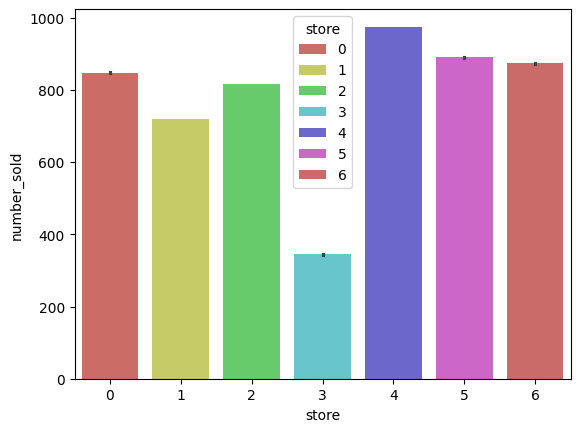

In [102]:
sns.barplot(x = "store", y = "number_sold", hue="store",  palette = 'hls', data = data_df)
plt.show()

bar plot of products vs sales

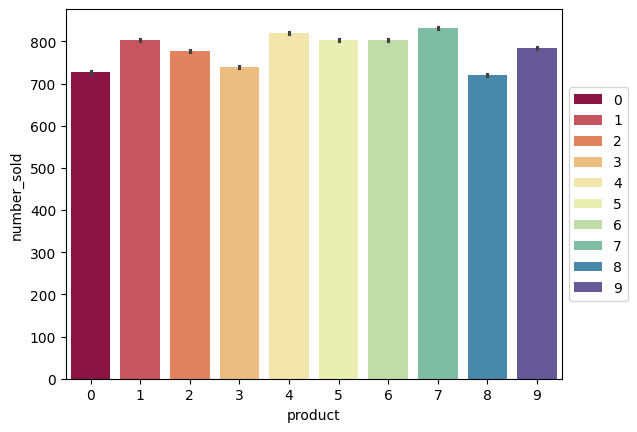

In [103]:
product_barplot = sns.barplot(x = "product", y = "number_sold", hue="product",
                              palette = 'Spectral', data = data_df, legend = "full")
# move legend outside of bR plot
product_barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

lineplot

In [104]:
data_df2 = data_df.groupby('Date')['number_sold'].sum()
data_df2 = data_df2.reset_index()
data_df2.head()

,Date,number_sold
0,2010-01-01,54870
1,2010-01-02,54960
2,2010-01-03,54863
3,2010-01-04,54926
4,2010-01-05,54634


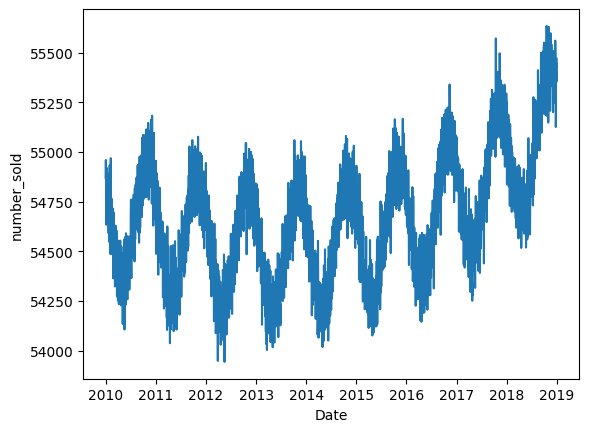

In [105]:
sns.lineplot(data=data_df2, x="Date", y="number_sold", legend="auto")
plt.show()

seperator

# Calculations and processing

In [106]:
data_df4 = data_df.copy()

In [107]:
scaler = MinMaxScaler(feature_range= (0, 1))
data_df4['number_sold_scaled'] = scaler.fit_transform(data_df4[['number_sold']])

In [108]:
data_df4.head()

,Date,store,product,number_sold,number_sold_scaled
0,2010-01-01,0,0,801,0.582213
1,2010-01-02,0,0,810,0.591520
2,2010-01-03,0,0,818,0.599793
3,2010-01-04,0,0,796,0.577042
4,2010-01-05,0,0,808,0.589452
